In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from multi_layer_perceptron import MLP

In [2]:
# Load dataset
dataset = load_digits()
X = dataset.data
Y = dataset.target

# One-hot encoding
Y = np.eye(10)[Y]

In [3]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (1437, 64), y_train shape: (1437, 10)
x_test shape: (360, 64), y_test shape: (360, 10)


In [4]:
# Initialize and train the model
model = MLP(input_dim=x_train.shape[1], output_dim=y_train.shape[1], 
            h1=128, h2=32, epochs=100, lr=0.001,
            act_func1="sigmoid", act_func2="sigmoid", act_func_output="softmax")

losses, accuracies = model.fit(x_train, y_train)

100%|██████████| 100/100 [00:12<00:00,  7.80it/s]


In [5]:
# Evaluate the model
loss_train, accuracy_train = model.evaluate(x_train, y_train)
loss_test, accuracy_test = model.evaluate(x_test, y_test)

print(f"loss_test: {loss_test:.4f}, accuracy_test: {accuracy_test:.4f}")
print(f"loss_train: {loss_train:.4f}, accuracy_train: {accuracy_train:.4f}")

loss_test: 0.0168, accuracy_test: 0.9083
loss_train: 0.0065, accuracy_train: 0.9715


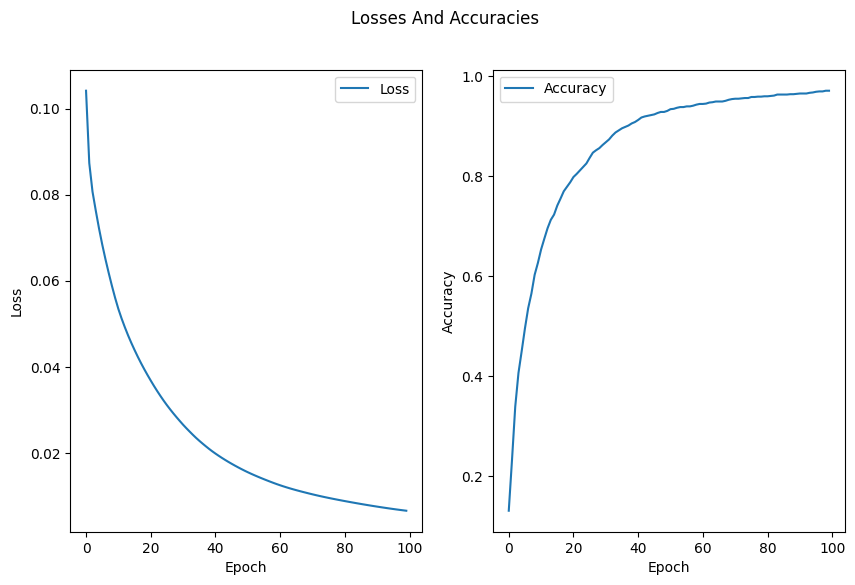

In [6]:
# Plot Losses and Accuracies
plt.figure(figsize=(10, 6))
plt.suptitle("Losses And Accuracies")

plt.subplot(1, 2, 1)
plt.plot(losses, label="Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.show()

1

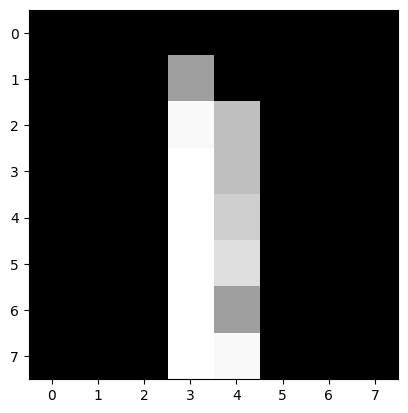

In [9]:
import cv2
image = cv2.imread("input/1.png")
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (8, 8))
plt.imshow(image, cmap="gray")

x = image.reshape(1, 64)
y_pred = model.predict([x])
np.argmax(y_pred)

7

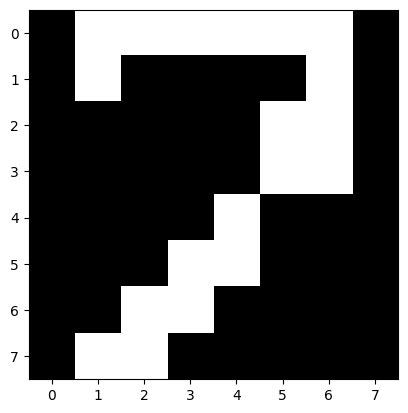

In [10]:
image = cv2.imread("input/7.png")
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (8, 8))
plt.imshow(image, cmap="gray")

x = image.reshape(1, 64)
y_pred = model.predict([x])
np.argmax(y_pred)